<a href="https://colab.research.google.com/github/farihanoor/INSE-6220/blob/main/Animal_Classification_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [ ]:
!pip install pycaret==3.0.0


**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

**Dataset**

The “Mammal Classification Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from UC Irvine Machine Learning Repository. The data set provided information about different attributes related to animal to identify the animal as mammal or non-mammal.

There are 5 attributes with 98 and one column for classification. 
**0 represents Non-Mammal and 1 represents Mammal.**

All attributes are numerical and they are listed bellow:

1. animal category (1-7 categories)
2. eggs (0 -> Doesn't lay eggs ; 1 -> Lays egg)
3. milk (0 -> Doesn't have milk glands ; 1 -> Has milk glands)
4. backbone (0 -> Doesn't have backbone ; 1 -> Has egg)
5. legs (0 -> (No. of legs it has)
6. type (Label) (0 -> Non-Mammal ; 1 -> Mammal)

The original dataset can be found on below link:
https://archive-beta.ics.uci.edu/dataset/111/zoo





In [448]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/farihanoor/INSE-6220/main/Zoo%20Dataset%20final%20trial.csv')
df.head(25)

,animal category,eggs,milk,backbone,legs,type
0,1,0,1,1,4,1
1,1,0,1,1,4,1
2,4,1,0,1,0,0
3,1,0,1,1,4,1
4,1,0,1,1,4,1
5,1,0,1,1,4,1
6,1,0,1,1,4,1
7,4,1,0,1,0,0
8,4,1,0,1,0,0
9,1,0,1,1,4,1


In [449]:
len(df.index)

99

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   animal category  99 non-null     int64
 1   eggs             99 non-null     int64
 2   milk             99 non-null     int64
 3   backbone         99 non-null     int64
 4    legs            99 non-null     int64
 5   type             99 non-null     int64
dtypes: int64(6)
memory usage: 4.8 KB


In [451]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  80


In [452]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

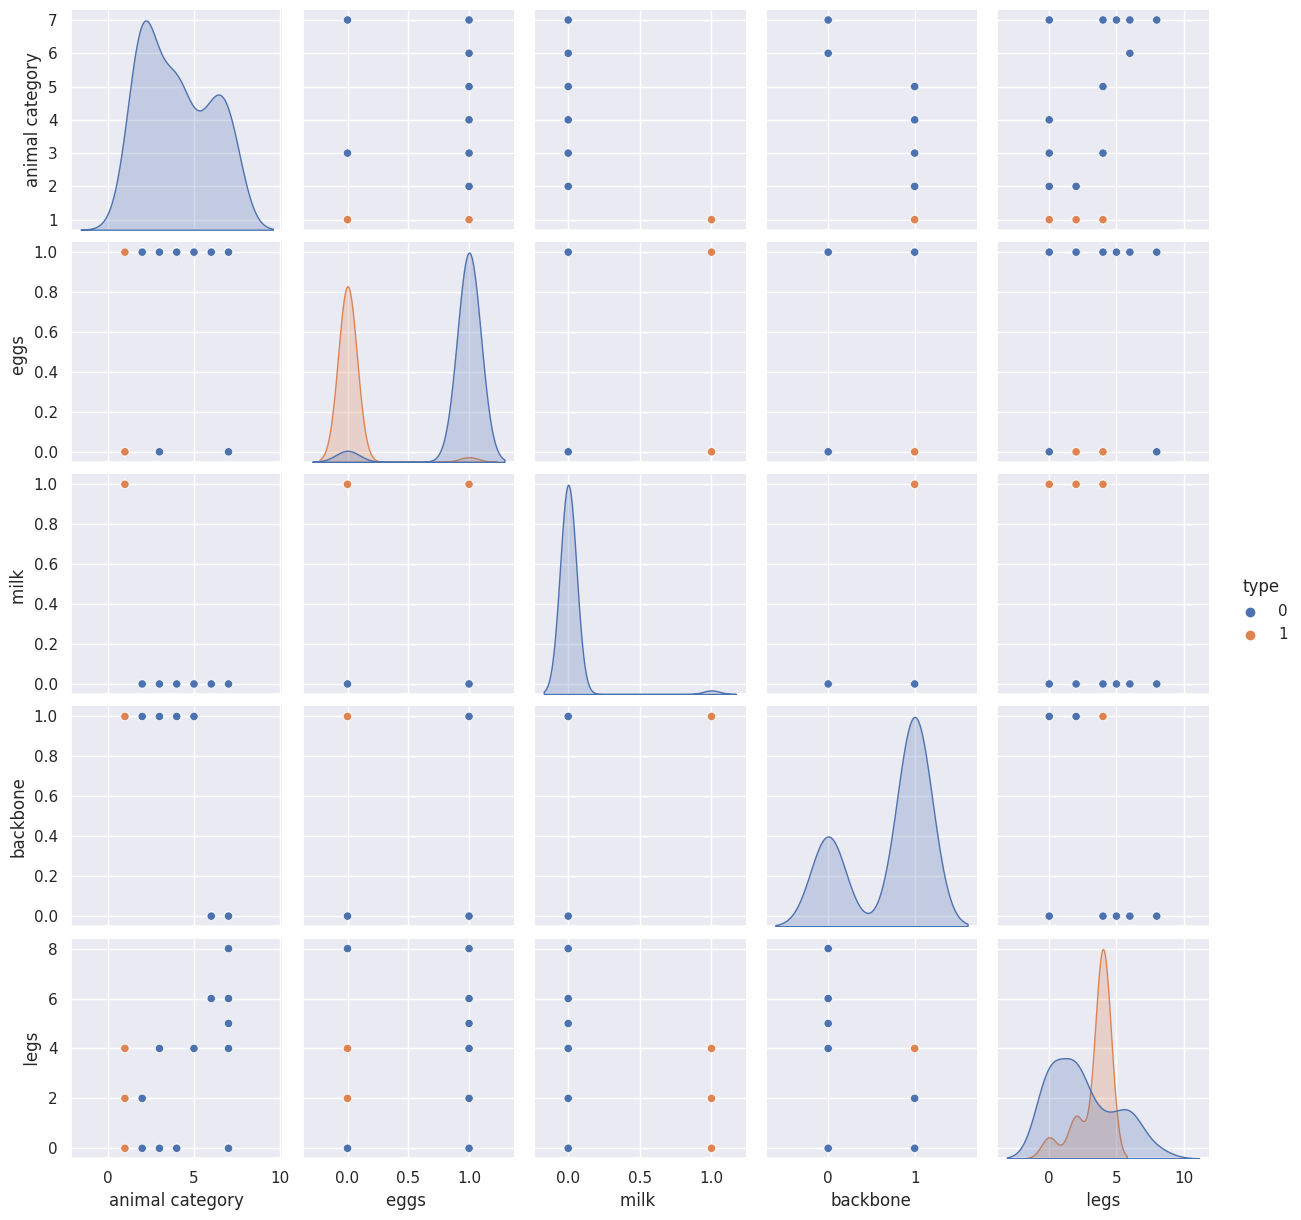

In [453]:
sns.pairplot(df, hue='type')
plt.show()

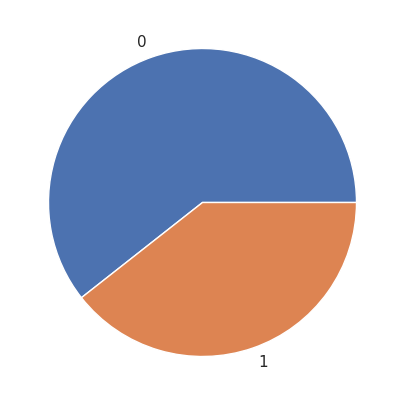

In [454]:
y =df['type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [455]:
X = df.drop(columns=['type'])
X.head(10)

,animal category,eggs,milk,backbone,legs
0,1,0,1,1,4
1,1,0,1,1,4
2,4,1,0,1,0
3,1,0,1,1,4
4,1,0,1,1,4
5,1,0,1,1,4
6,1,0,1,1,4
7,4,1,0,1,0
8,4,1,0,1,0
9,1,0,1,1,4


In [456]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
animal category,99.0,2.818182,2.106180,1.0,1.0,2.0,4.0,7.0
eggs,99.0,0.585859,0.495080,0.0,0.0,1.0,1.0,1.0
milk,99.0,0.404040,0.493203,0.0,0.0,0.0,1.0,1.0
backbone,99.0,0.818182,0.387657,0.0,1.0,1.0,1.0,1.0
legs,99.0,2.838384,2.048927,0.0,2.0,4.0,4.0,8.0


**Standardize the Data**

In [457]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,animal category,eggs,milk,backbone,legs
0,-0.867654,-1.189384,1.214496,0.471405,0.569824
1,-0.867654,-1.189384,1.214496,0.471405,0.569824
2,0.563975,0.840771,-0.823387,0.471405,-1.392352
3,-0.867654,-1.189384,1.214496,0.471405,0.569824
4,-0.867654,-1.189384,1.214496,0.471405,0.569824
5,-0.867654,-1.189384,1.214496,0.471405,0.569824
6,-0.867654,-1.189384,1.214496,0.471405,0.569824
7,0.563975,0.840771,-0.823387,0.471405,-1.392352
8,0.563975,0.840771,-0.823387,0.471405,-1.392352
9,-0.867654,-1.189384,1.214496,0.471405,0.569824


In [458]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
animal category,99.0,-8.242565e-17,1.005089,-0.867654,-0.867654,-0.390444,0.563975,1.995604
eggs,99.0,-2.018587e-17,1.005089,-1.189384,-1.189384,0.840771,0.840771,0.840771
milk,99.0,8.522924e-17,1.005089,-0.823387,-0.823387,-0.823387,1.214496,1.214496
backbone,99.0,-1.261617e-16,1.005089,-2.121320,0.471405,0.471405,0.471405,0.471405
legs,99.0,8.803284e-17,1.005089,-1.392352,-0.411264,0.569824,0.569824,2.532000


**Observations and variables**

In [459]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

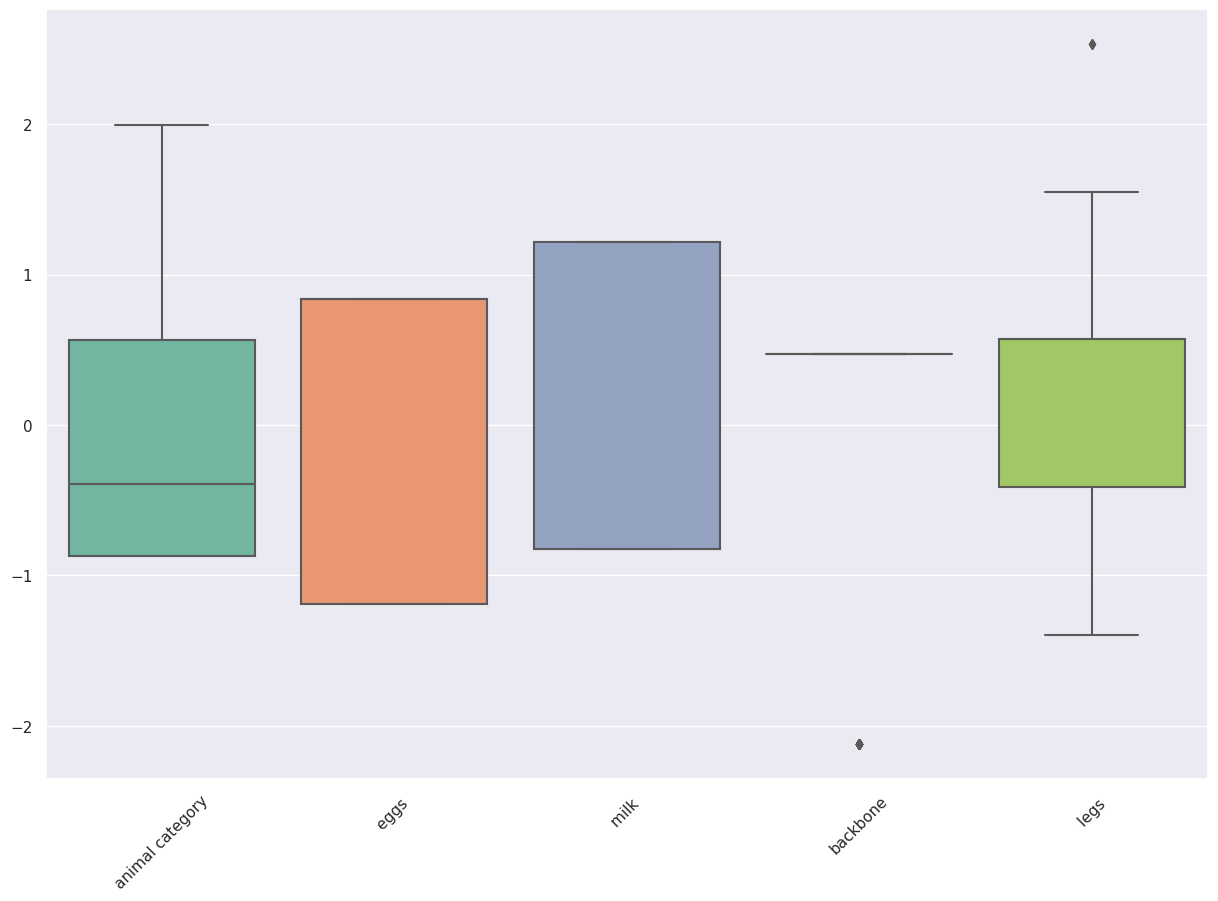

In [460]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

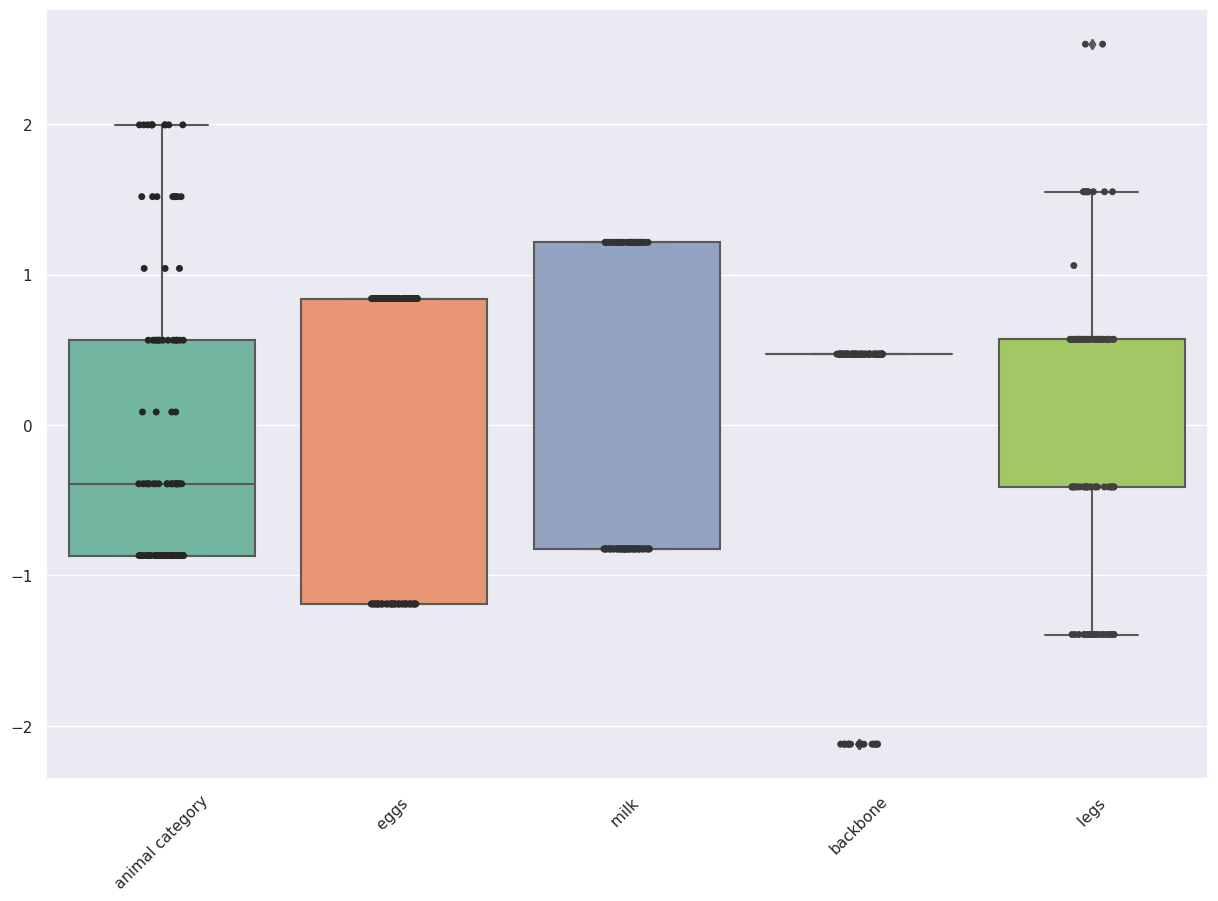

In [461]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

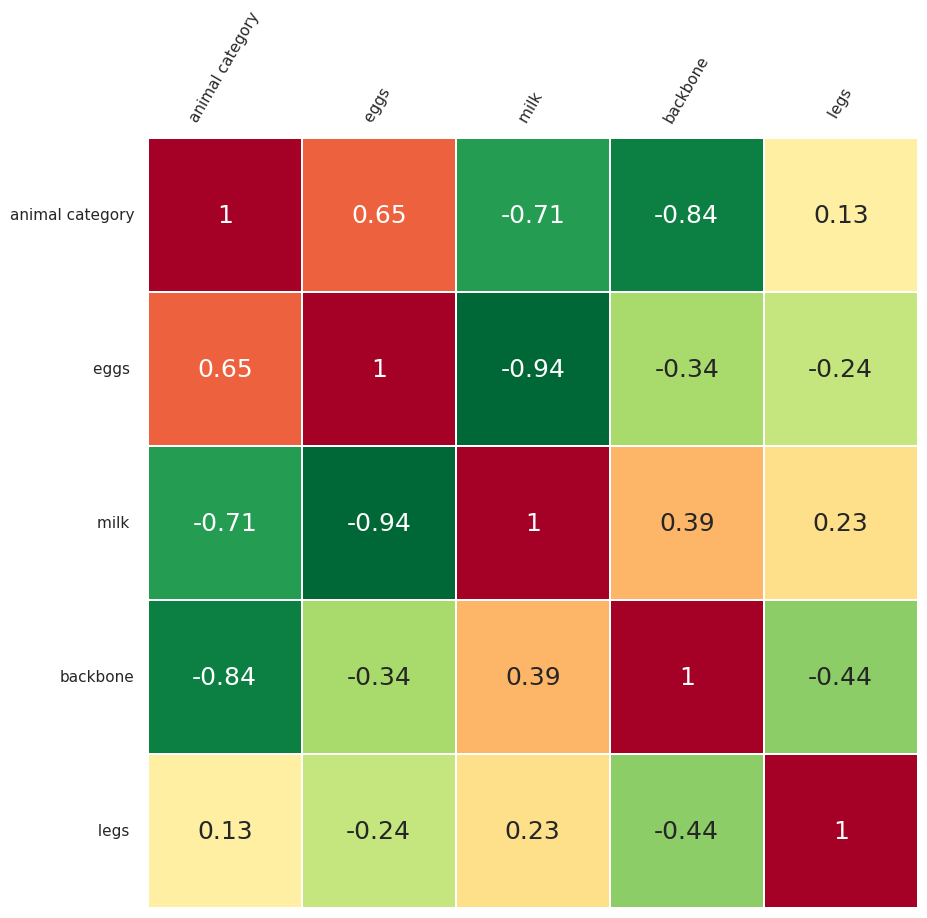

In [462]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

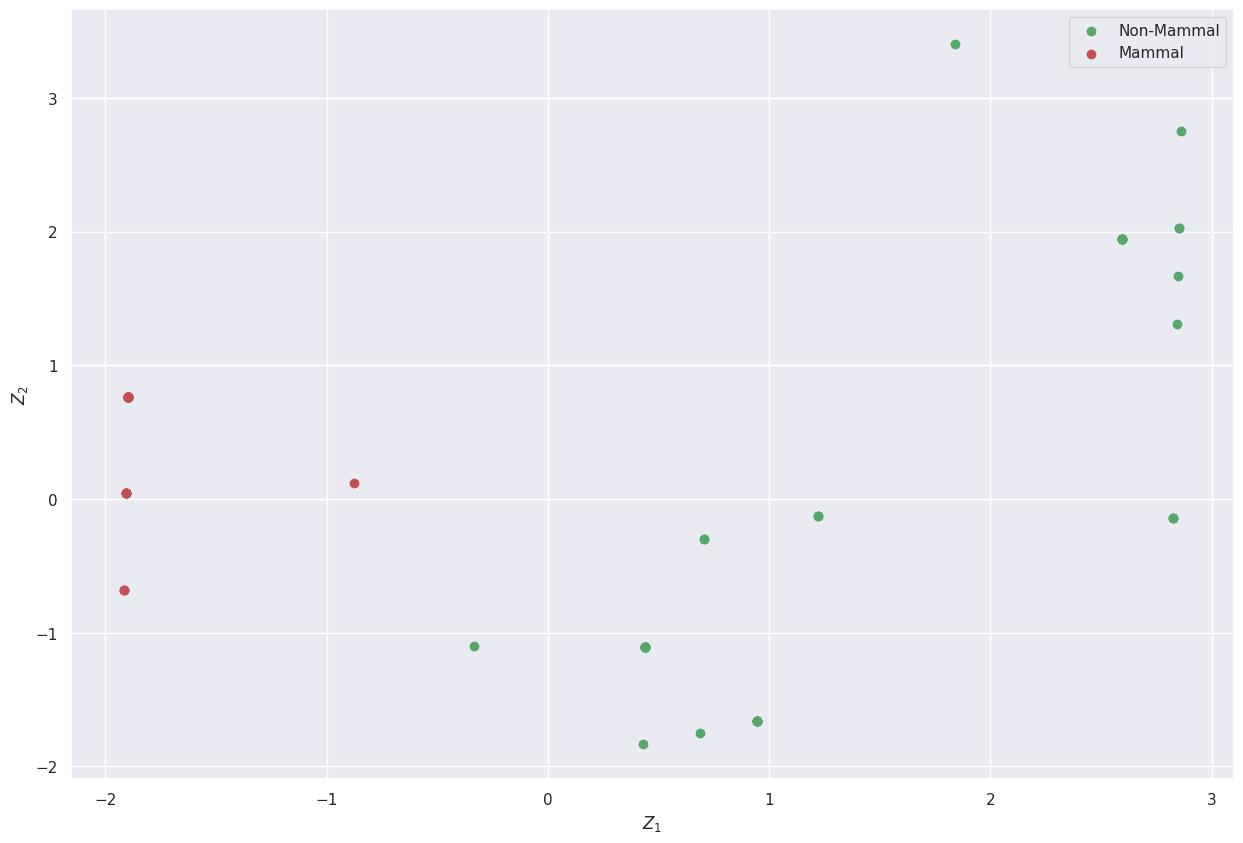

In [463]:
pca = PCA()
Z = pca.fit_transform(X)

# (Mammal)->1,  (Non-mammal)->0

idx_non_mammal= np.where(y == 0)
idx_mammal = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_non_mammal,0], Z[idx_non_mammal,1], c='g', label='Non-Mammal')
plt.scatter(Z[idx_mammal,0], Z[idx_mammal,1], c='r', label='Mammal')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 0.54121035,  0.17914769,  0.34203664,  0.58770232,  0.46110128],
       [ 0.50328372, -0.31862737, -0.40485928, -0.50440459,  0.47628464],
       [-0.52174663,  0.29016144,  0.30472429, -0.31318285,  0.67279002],
       [-0.42601843, -0.48817246, -0.431373  ,  0.53684266,  0.32544314],
       [ 0.00925269,  0.73747996, -0.6634458 ,  0.1178917 ,  0.04448494]])

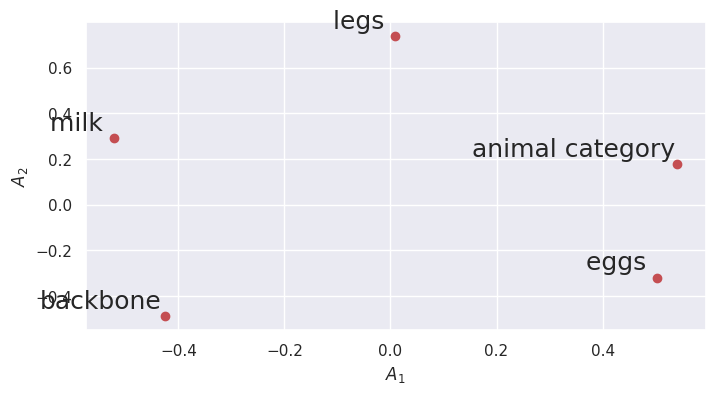

In [464]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

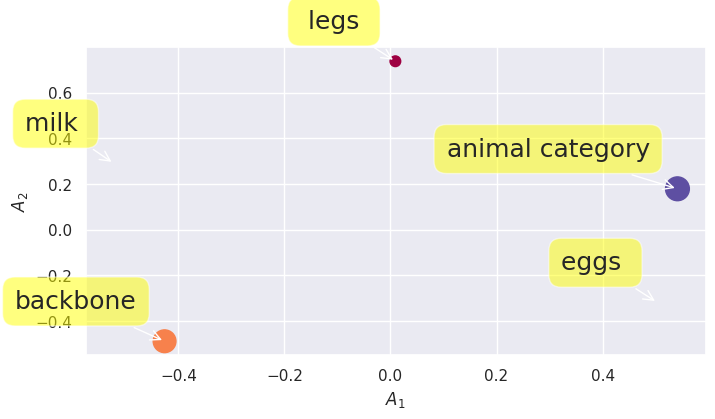

In [465]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([2.98851945, 1.52736825, 0.40445988, 0.08074594, 0.04992688])

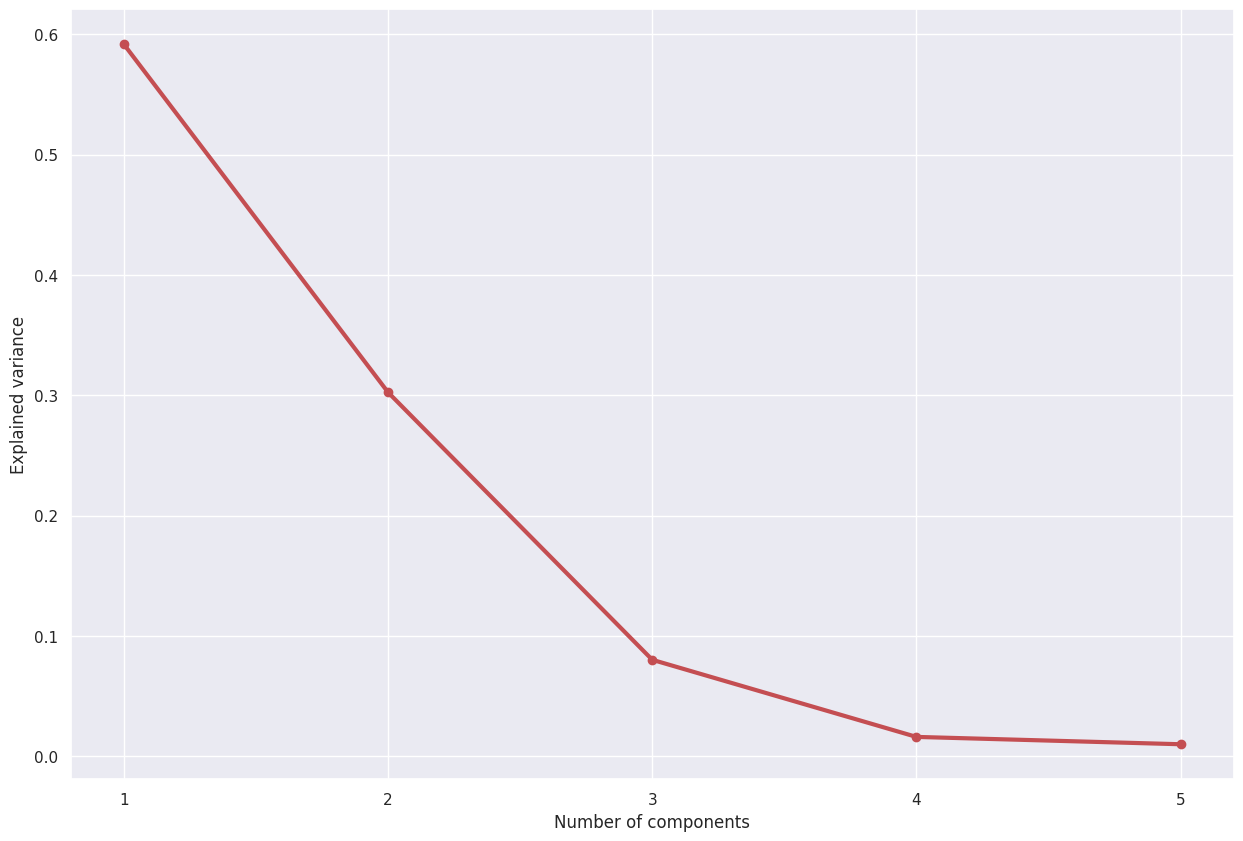

In [466]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

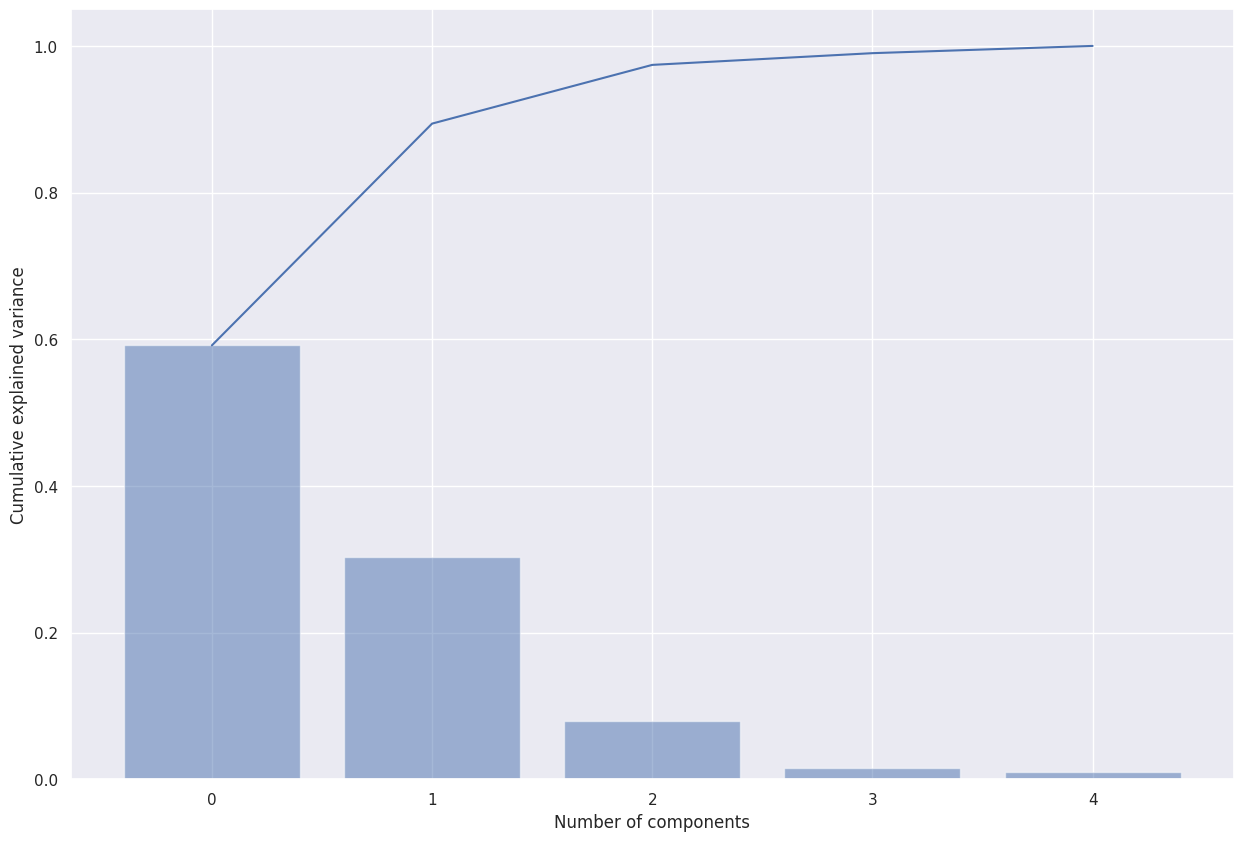

In [467]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 0.76603893,  0.76603893, -1.66273169,  0.76603893,  0.76603893,
        0.76603893,  0.76603893, -1.66273169, -1.66273169,  0.76603893,
        0.76603893, -1.11018091, -1.66273169, -0.14056183,  1.30650371,
        2.03003648, -1.11018091,  0.76603893, -1.66273169, -0.68102661,
       -1.11018091, -1.11018091,  0.76603893, -1.11018091,  1.94454549,
       -0.13017516,  0.04250616,  0.76603893,  0.04250616,  1.94454549,
        0.76603893,  0.04250616, -1.11018091, -1.66273169,  0.76603893,
        0.76603893, -1.11018091, -1.66273169,  1.94454549,  1.94454549,
       -1.11018091,  1.94454549, -1.11018091,  0.76603893,  0.76603893,
        2.03003648,  0.76603893,  0.76603893,  0.76603893,  0.76603893,
        1.94454549, -0.13017516,  2.75356925,  0.76603893,  0.76603893,
       -1.11018091, -1.11018091, -1.11018091, -1.11018091, -1.66273169,
       -1.66273169, -1.74822269,  0.11917587,  0.76603893,  0.76603893,
       -0.68102661,  0.76603893,  0.76603893,  0.76603893,  0.76

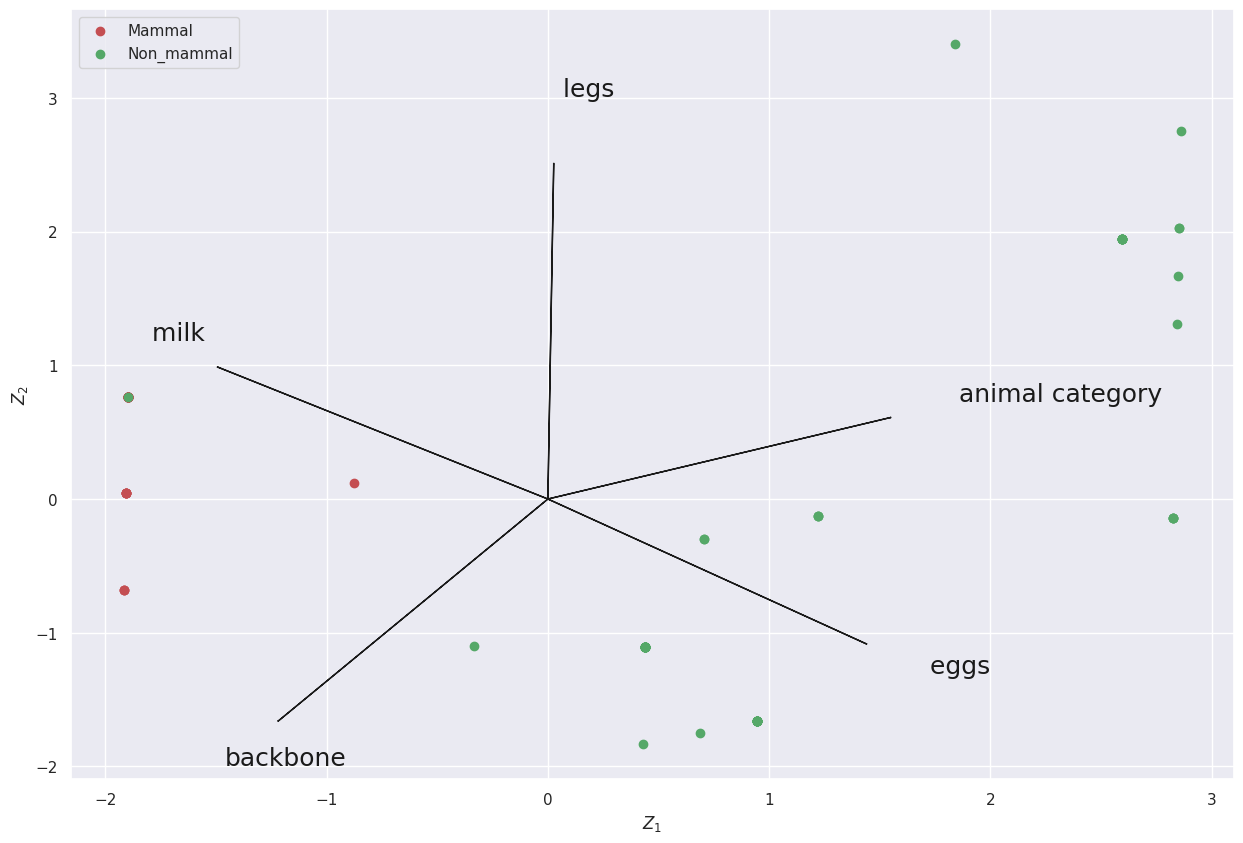

In [468]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_mammal,0], Z[idx_mammal,1], c='r', label='Mammal')
plt.scatter(Z[idx_non_mammal,0], Z[idx_non_mammal,1], c='g', label='Non_mammal')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [436]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [469]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [470]:
out['PC']

,PC1,PC2,PC3
0,-1.897394,0.766039,-0.026548
1,-1.897394,0.766039,-0.026548
2,0.944265,-1.662732,0.321999
3,-1.897394,0.766039,-0.026548
4,-1.897394,0.766039,-0.026548
...,...,...,...
94,-1.906472,0.042506,0.624350
95,2.592588,1.944545,-0.185819
96,-1.897394,0.766039,-0.026548
97,2.823626,-0.140562,1.930100


**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.01%] of the variance'}, xlabel='PC1 (59.1% expl.var)', ylabel='PC2 (30.2% expl.var)'>)

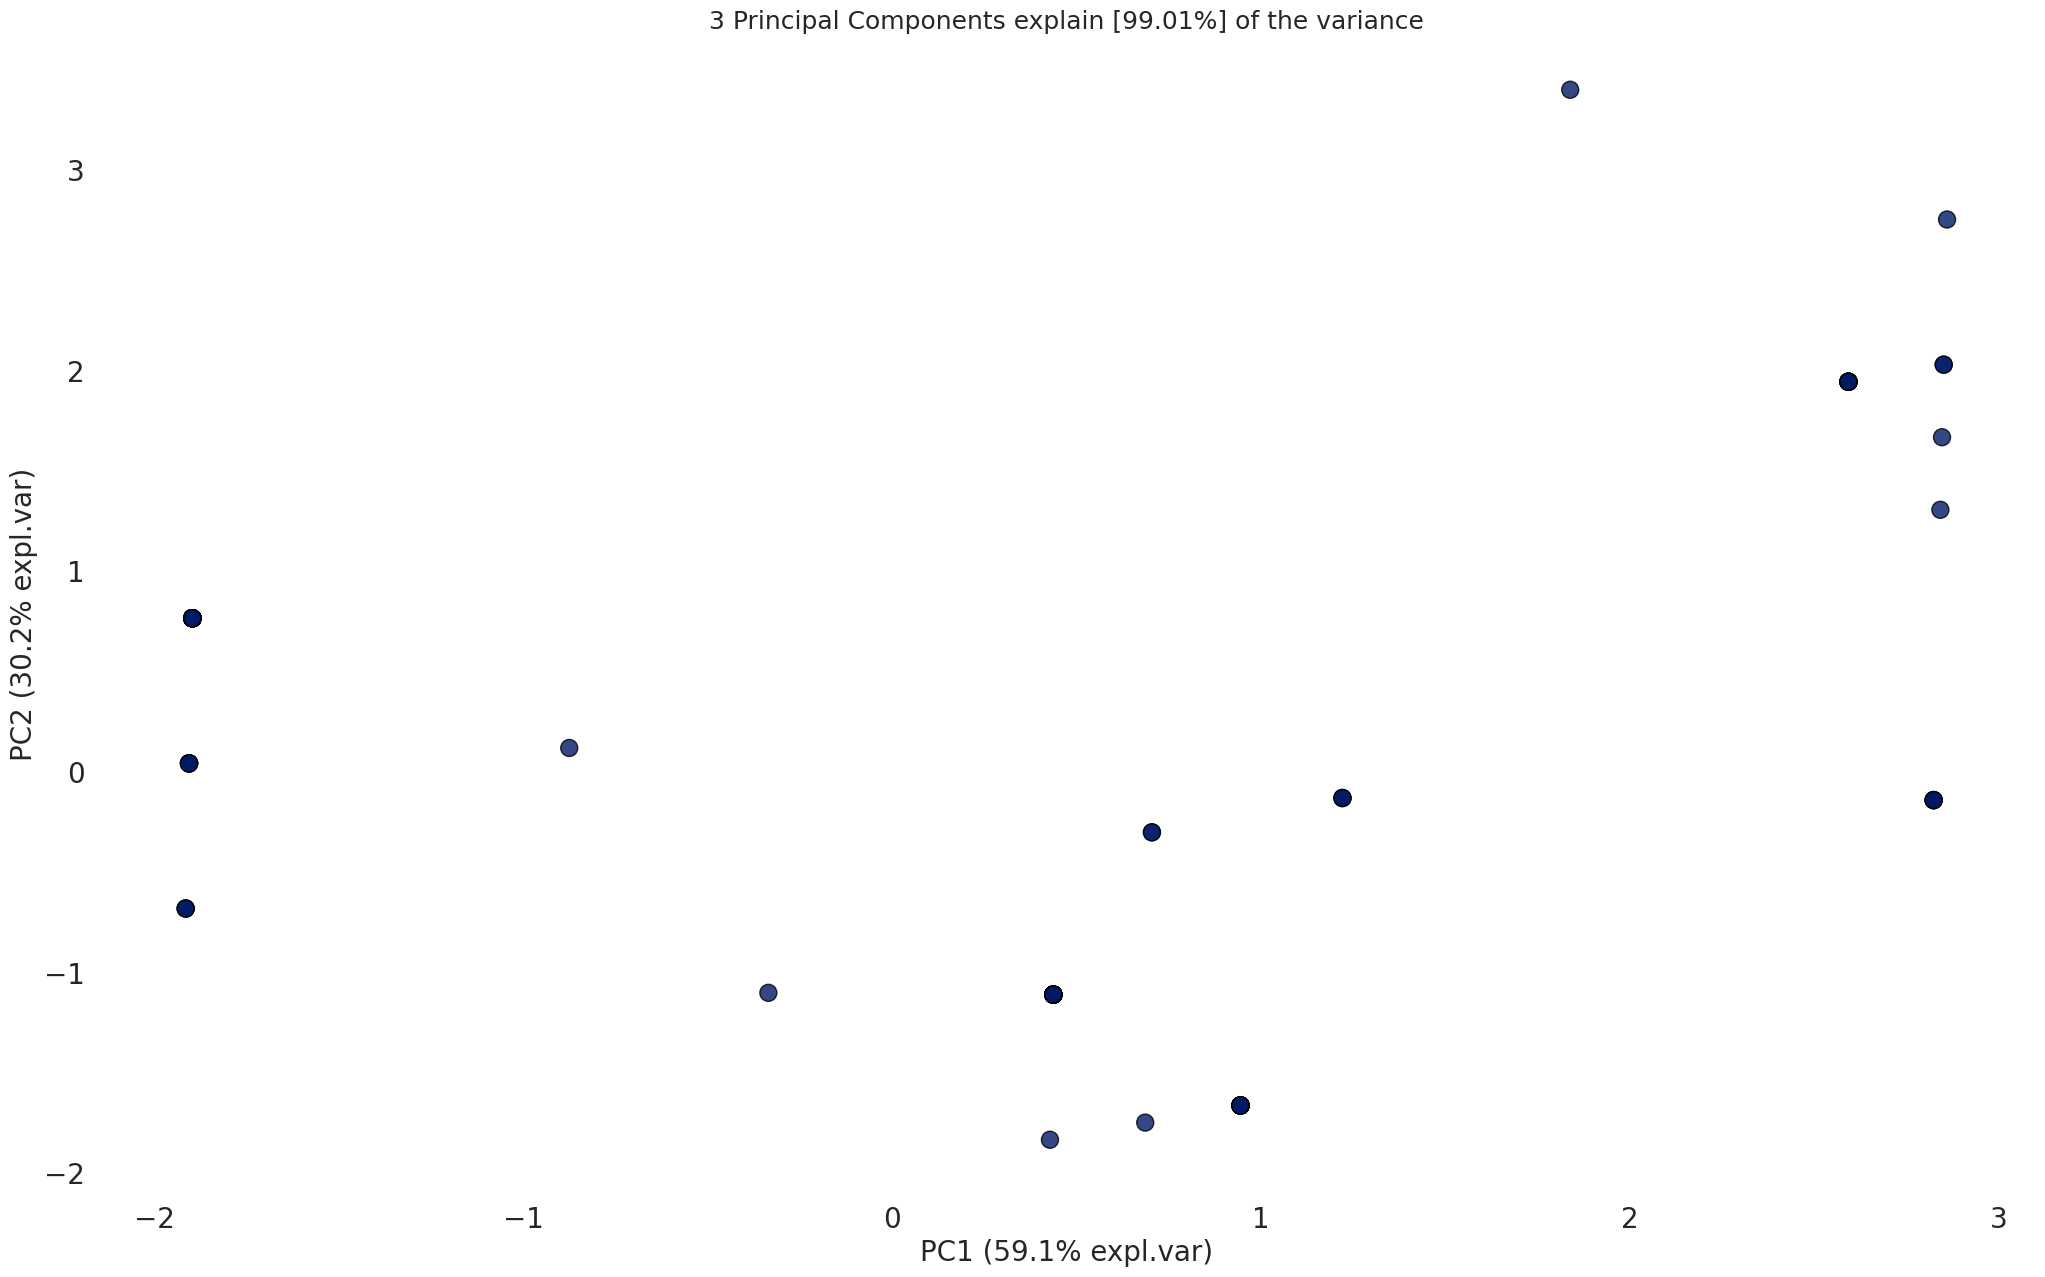

In [471]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [472]:
A = out['loadings'].T
A

,PC1,PC2,PC3
animal category,0.541210,0.179148,0.342037
eggs,0.503284,-0.318627,-0.404859
milk,-0.521747,0.290161,0.304724
backbone,-0.426018,-0.488172,-0.431373
legs,0.009253,0.737480,-0.663446


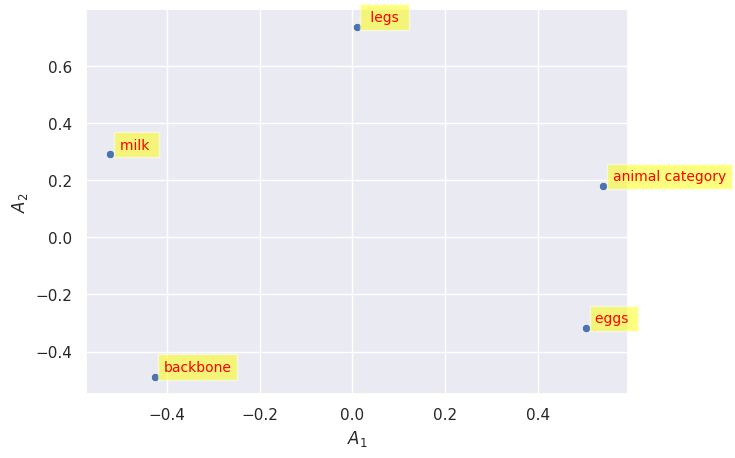

In [473]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

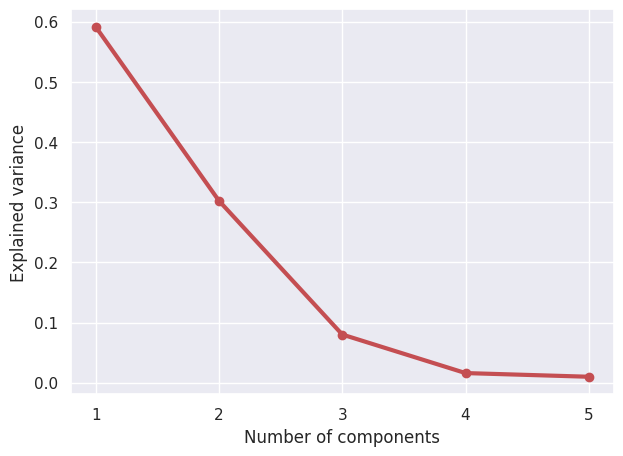

In [474]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

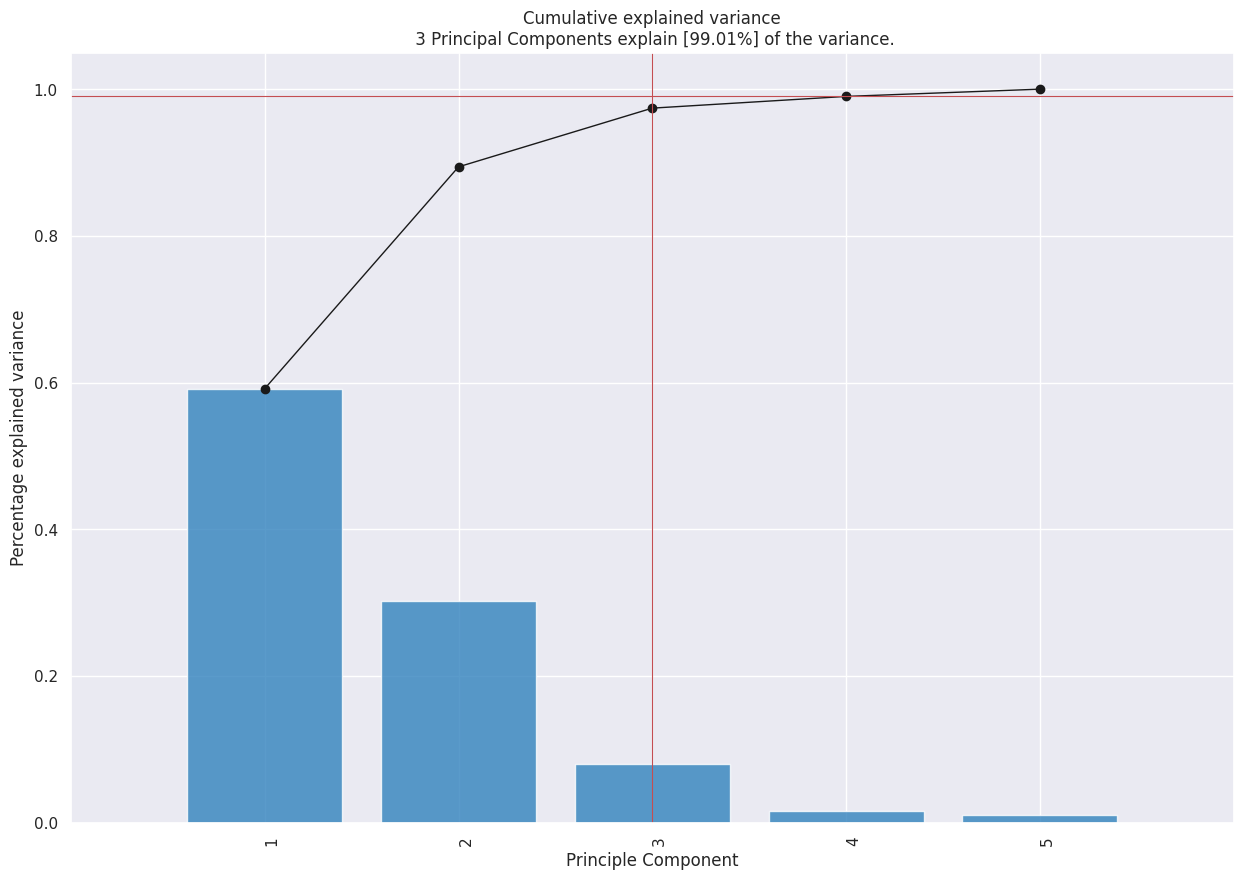

<Figure size 700x500 with 0 Axes>

In [475]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


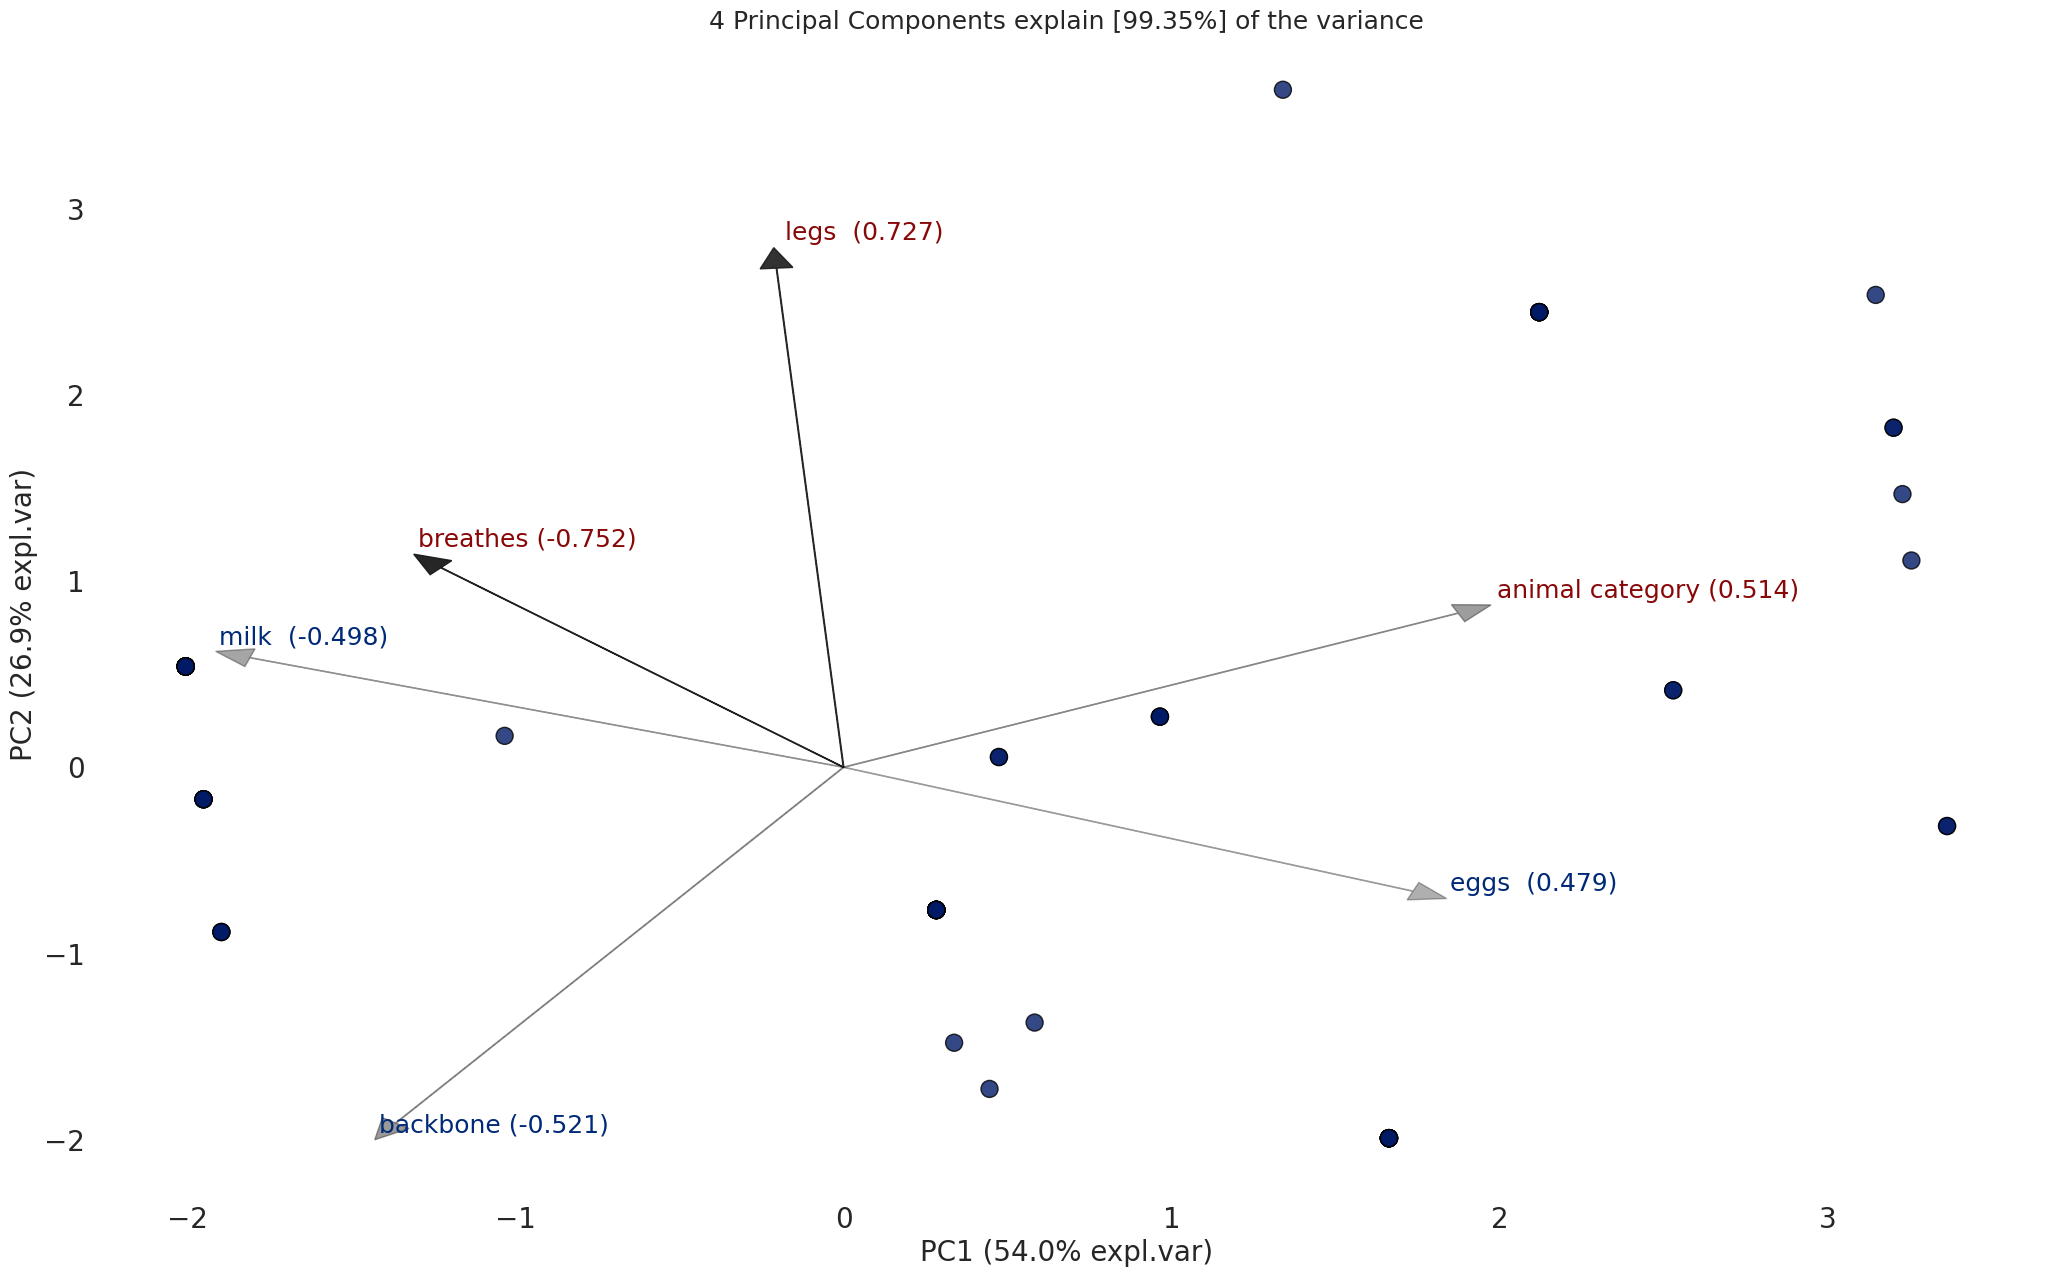

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.35%] of the variance'}, xlabel='PC1 (54.0% expl.var)', ylabel='PC2 (26.9% expl.var)'>)

In [444]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


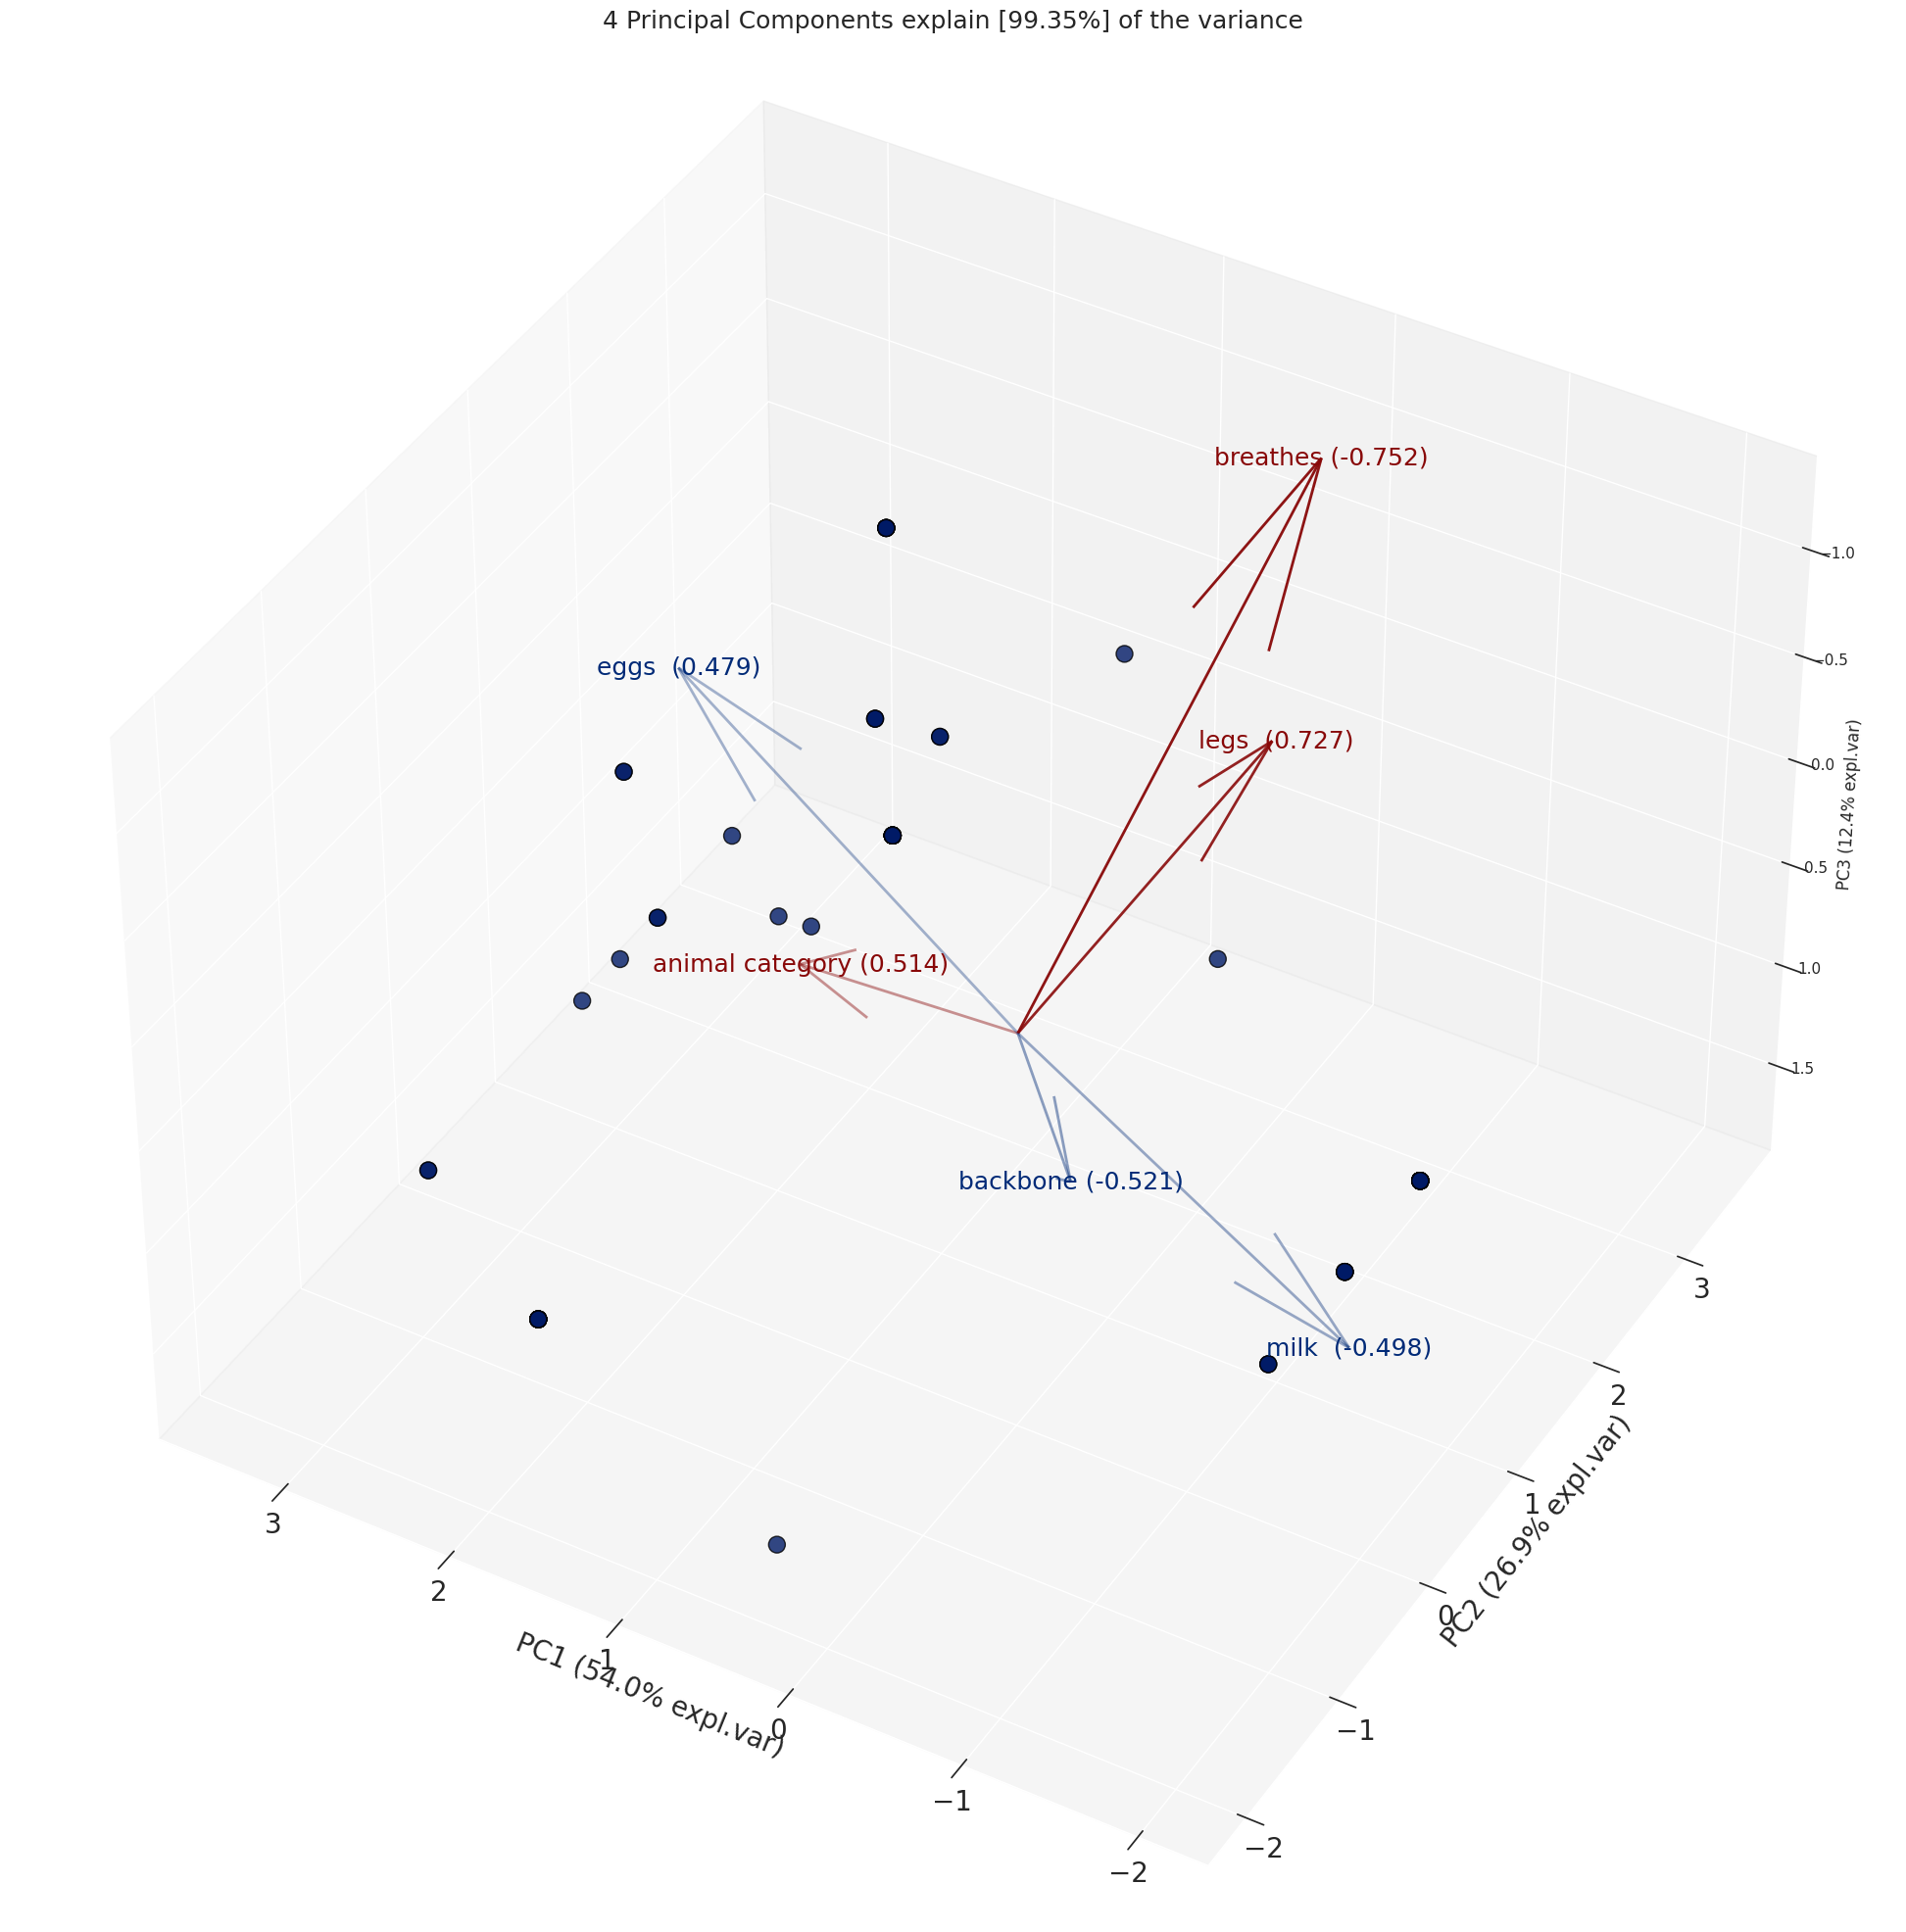

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [99.35%] of the variance'}, xlabel='PC1 (54.0% expl.var)', ylabel='PC2 (26.9% expl.var)', zlabel='PC3 (12.4% expl.var)'>)

In [445]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [446]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [447]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

ImportError: ignored

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='type', train_size=0.7, session_id=123)

**Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

In [ ]:
best_model

 Create a Model

**Logistic Regresssion**

In [ ]:
lr = create_model('lr')

**Tune the model**

In [ ]:
tuned_lr=tune_model(lr)

In [ ]:
tuned_lr

**Evaluate Logistic Regression**


In [ ]:
evaluate_model(tuned_lr)

**Create model with K-nearest neighbour**

In [ ]:
knn = create_model('knn')

**Tune model with K-nearest neighbour**

In [ ]:
tuned_knn = tune_model(knn)

In [ ]:
tuned_knn

**Evaluate model with K-nearest neighbour**

In [ ]:
evaluate_model(tuned_knn)

**Create model with Quadratic Discriminant Analysis**

In [ ]:
qda=create_model('qda')

**Tune QDA Model**

In [ ]:
tuned_qda=tune_model(qda)

**Evaluate QDA Model**

In [ ]:
tuned_qda

In [ ]:
evaluate_model(tuned_qda)

In [ ]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='diagnosis', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

# **Best model with PCA**

In [ ]:
best_model_pca

# **Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

# **Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

In [ ]:
lr_pca = create_model('lr')

# **Tune Model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

# **Evaluate Model**

In [ ]:
tuned_lr_pca

In [ ]:
evaluate_model(tuned_lr_pca)

# **Create K-nearest neighbour Model**

In [ ]:
knn_pca = create_model('knn')

# **Tune Model**

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

In [ ]:
tuned_knn_pca

# **Evaluate Model KNN**

In [ ]:
evaluate_model(tuned_knn_pca)

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

# **Tune model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

# **Evaluate Model**

In [ ]:
tuned_qda_pca

In [ ]:
evaluate_model(tuned_qda_pca)

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

In [ ]:
tuned_et_pca = tune_model(et_pca)

In [ ]:
tuned_et_pca

In [ ]:
evaluate_model(tuned_et_pca)

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')